# Only true data

## (i) Importing the necessary packages

In [12]:
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from model_ACGAN import discriminator
import torch
from preprocessing_sub import *


In [13]:
## Loading and visualizing the data

## Loading the dataset


# data_loader
X_test = np.load(r"data/true_data/x_test.npy")
y_test = np.load(r"data/true_data/y_test.npy")
    #person_train_valid = np.load(r"true_data/person_train_valid.npy")
X_train_valid = np.load(r"data/true_data/X_train_valid.npy")
y_train_valid = np.load(r"data/true_data/y_train_valid.npy")
# person_test = np.load("person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

In [14]:
x_train, y_train, x_valid, y_valid, x_test, y_test = main_prep(X_train_valid,y_train_valid,X_test, y_test,2,2,True)


IndexError: index 288 is out of bounds for axis 0 with size 288

In [5]:
x_train, y_train, x_valid, y_valid, x_test, y_test = main_prep(X_train_valid,y_train_valid,X_test, y_test,2,2,True)


Shape of X after trimming: (288, 22, 500)
Shape of X after maxpooling: (288, 22, 250)
Shape of X after averaging+noise and concatenating: (576, 22, 250)
Shape of X after subsampling and concatenating: (1152, 22, 250)
Shape of X after trimming: (288, 22, 500)
Shape of X after maxpooling: (288, 22, 250)
Shape of X after averaging+noise and concatenating: (576, 22, 250)
Shape of X after subsampling and concatenating: (1152, 22, 250)
Shape of training set: (952, 22, 250)
Shape of validation set: (200, 22, 250)
Shape of training labels: (952,)
Shape of validation labels: (200,)
Shape of training labels after categorical conversion: (952, 4)
Shape of validation labels after categorical conversion: (200, 4)
Shape of test labels after categorical conversion: (1152, 4)
Shape of training set after adding width info: (952, 22, 250, 1)
Shape of validation set after adding width info: (200, 22, 250, 1)
Shape of test set after adding width info: (1152, 22, 250, 1)
Shape of training set after dimensi

## (iii)(CNN) Defining the architecture of a basic CNN model

In [6]:
# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 1, 25)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 84, 1, 25)        100       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 84, 1, 25)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 1, 50)        0

## (iv)(CNN) Defining the hyperparameters of the basic CNN model

In [7]:
# Model parameters
learning_rate = 1e-3
epochs = 70
cnn_optimizer = tensorflow.keras.optimizers.Adam(lr=learning_rate)

## (v)(CNN) Compiling, training and validating the model

In [8]:
# Compiling the model
basic_cnn_model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_results = basic_cnn_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_test, y_test), verbose=True)


Epoch 1/70
15/15 [==============================] - 5s 125ms/step - loss: 2.4856 - accuracy: 0.2426 - val_loss: 2.1725 - val_accuracy: 0.2405
Epoch 2/70
15/15 [==============================] - 1s 94ms/step - loss: 2.3337 - accuracy: 0.2899 - val_loss: 1.7097 - val_accuracy: 0.2465
Epoch 3/70
15/15 [==============================] - 2s 104ms/step - loss: 2.2623 - accuracy: 0.2626 - val_loss: 1.6912 - val_accuracy: 0.2413
Epoch 4/70
15/15 [==============================] - 1s 91ms/step - loss: 2.1733 - accuracy: 0.2857 - val_loss: 1.8193 - val_accuracy: 0.2474
Epoch 5/70
15/15 [==============================] - 1s 100ms/step - loss: 2.0697 - accuracy: 0.2847 - val_loss: 1.4741 - val_accuracy: 0.2700
Epoch 6/70
15/15 [==============================] - 1s 90ms/step - loss: 2.0345 - accuracy: 0.2658 - val_loss: 1.6217 - val_accuracy: 0.2682
Epoch 7/70
15/15 [==============================] - 1s 90ms/step - loss: 1.8932 - accuracy: 0.2836 - val_loss: 1.7220 - val_accuracy: 0.2491
Epoch 8/70

## (vi)(CNN) Visualizing the accuracy and loss trajectory

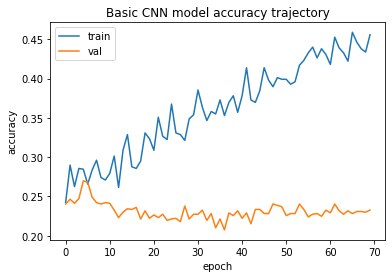

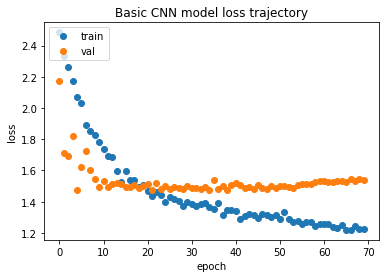

In [9]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_results.history['accuracy'])
plt.plot(basic_cnn_model_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_results.history['loss'],'o')
plt.plot(basic_cnn_model_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## (vii)(CNN) Testing the performance of the basic CNN model on the held out test set

In [10]:
## Testing the basic CNN model

cnn_score = basic_cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.2326388955116272


# Add fake data - ACGAN shape(N,22,250,1)


In [11]:
fake_ACGAN = np.load('ACGAN_generate_X.npy')
fake_label = np.load('generate_label.npy')

fake_ACGAN = np.swapaxes(fake_ACGAN, 1,3)
fake_ACGAN = np.swapaxes(fake_ACGAN, 1,2)

#Add 8460/4 fake data
x_train_plus = np.vstack((x_train, fake_ACGAN[0:fake_ACGAN.shape[0]//3]))
y_train_plus = np.vstack((y_train, fake_label[0:fake_ACGAN.shape[0]//3]))
p = np.random.permutation(x_train.shape[0])
x_train_plus, y_train_plus = x_train_plus[p], y_train_plus[p]

FileNotFoundError: [Errno 2] No such file or directory: 'ACGAN_generate_X.npy'

In [86]:
# Building the CNN model using sequential class
basic_cnn_model_1 = Sequential()

# Conv. block 1
basic_cnn_model_1.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
basic_cnn_model_1.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model_1.add(BatchNormalization())
basic_cnn_model_1.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model_1.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model_1.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model_1.add(BatchNormalization())
basic_cnn_model_1.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model_1.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model_1.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model_1.add(BatchNormalization())
basic_cnn_model_1.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model_1.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model_1.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model_1.add(BatchNormalization())
basic_cnn_model_1.add(Dropout(0.5))

# # Conv. block 5
# basic_cnn_model.add(Conv2D(filters=400, kernel_size=(10,1), padding='same', activation='elu'))
# basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
# basic_cnn_model.add(BatchNormalization())
# basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model_1.add(Flatten()) # Flattens the input
basic_cnn_model_1.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model_1.summary()


# Model parameters
learning_rate = 1e-3
epochs = 70
cnn_optimizer = tensorflow.keras.optimizers.Adam(lr=learning_rate)

# Compiling the model
basic_cnn_model_1.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_1_results = basic_cnn_model_1.fit(x_train_plus,
             y_train_plus,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_test, y_test), verbose=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 84, 1, 25)        0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 84, 1, 25)        100       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 84, 1, 25)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 28, 1, 50)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/70
109/109 [==============================] - 2s 10ms/step - loss: 1.9938 - accuracy: 0.3135 - val_loss: 1.3785 - val_accuracy: 0.4052
Epoch 2/70
109/109 [==============================] - 1s 7ms/step - loss: 1.5620 - accuracy: 0.3598 - val_loss: 1.3047 - val_accuracy: 0.3939
Epoch 3/70
109/109 [==============================] - 1s 8ms/step - loss: 1.3628 - accuracy: 0.4102 - val_loss: 1.2430 - val_accuracy: 0.4046
Epoch 4/70
109/109 [==============================] - 1s 8ms/step - loss: 1.2503 - accuracy: 0.4583 - val_loss: 1.1836 - val_accuracy: 0.4707
Epoch 5/70
109/109 [==============================] - 1s 8ms/step - loss: 1.1746 - accuracy: 0.4945 - val_loss: 1.1467 - val_accuracy: 0.4944
Epoch 6/70
109/109 [==============================] - 1s 8ms/step - loss: 1.0879 - accuracy: 0.5414 - val_loss: 1.1877 - val_accuracy: 0.4802
Epoch 7/70
109/109 [==============================] - 1s 8ms/step - loss: 1.0469 - accuracy: 0.5596 - val_loss: 1.0154 - val_accuracy: 0.5796
Epoch

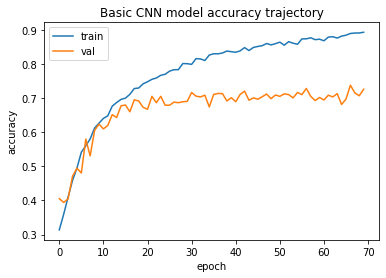

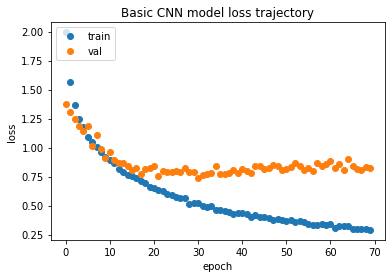

In [87]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_1_results.history['accuracy'])
plt.plot(basic_cnn_model_1_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_1_results.history['loss'],'o')
plt.plot(basic_cnn_model_1_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [88]:
## Testing the basic CNN model

cnn_score = basic_cnn_model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.7257336378097534


#Add fake data - WGAN

In [109]:
fake_WGAN = np.load('WGAN_generate_X.npy')
fake_label = np.load('generate_label.npy')

fake_WGAN = np.swapaxes(fake_WGAN, 1,3)
fake_WGAN = np.swapaxes(fake_WGAN, 1,2)

#Add 8460/4 fake data
x_train_plus = np.vstack((x_train, fake_ACGAN[0:fake_WGAN.shape[0]//3]))
y_train_plus = np.vstack((y_train, fake_label[0:fake_WGAN.shape[0]//3]))
p = np.random.permutation(x_train.shape[0])
x_train_plus, y_train_plus = x_train_plus[p], y_train_plus[p]

# Building the CNN model using sequential class
basic_cnn_model_2 = Sequential()

# Conv. block 1
basic_cnn_model_2.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
basic_cnn_model_2.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model_2.add(BatchNormalization())
basic_cnn_model_2.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model_2.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model_2.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model_2.add(BatchNormalization())
basic_cnn_model_2.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model_2.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model_2.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model_2.add(BatchNormalization())
basic_cnn_model_2.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model_2.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model_2.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model_2.add(BatchNormalization())
basic_cnn_model_2.add(Dropout(0.5))

# # Conv. block 5
# basic_cnn_model.add(Conv2D(filters=400, kernel_size=(10,1), padding='same', activation='elu'))
# basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
# basic_cnn_model.add(BatchNormalization())
# basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model_2.add(Flatten()) # Flattens the input
basic_cnn_model_2.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation


# Printing the model summary
basic_cnn_model_2.summary()


# Model parameters
learning_rate = 1e-3
epochs = 80
cnn_optimizer = tensorflow.keras.optimizers.Adam(lr=learning_rate)

# Compiling the model
basic_cnn_model_2.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_2_results = basic_cnn_model_2.fit(x_train_plus,
             y_train_plus,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_test, y_test), verbose=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 84, 1, 25)        0         
 g2D)                                                            
                                                                 
 batch_normalization_40 (Bat  (None, 84, 1, 25)        100       
 chNormalization)                                                
                                                                 
 dropout_40 (Dropout)        (None, 84, 1, 25)         0         
                                                                 
 conv2d_41 (Conv2D)          (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 28, 1, 50)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
109/109 [==============================] - 2s 10ms/step - loss: 2.0014 - accuracy: 0.3210 - val_loss: 1.3634 - val_accuracy: 0.3950
Epoch 2/80
109/109 [==============================] - 1s 8ms/step - loss: 1.5232 - accuracy: 0.3932 - val_loss: 1.3270 - val_accuracy: 0.4001
Epoch 3/80
109/109 [==============================] - 1s 8ms/step - loss: 1.3085 - accuracy: 0.4458 - val_loss: 1.2073 - val_accuracy: 0.4447
Epoch 4/80
109/109 [==============================] - 1s 8ms/step - loss: 1.1806 - accuracy: 0.4925 - val_loss: 1.2188 - val_accuracy: 0.4673
Epoch 5/80
109/109 [==============================] - 1s 7ms/step - loss: 1.1448 - accuracy: 0.5182 - val_loss: 1.0792 - val_accuracy: 0.5333
Epoch 6/80
109/109 [==============================] - 1s 7ms/step - loss: 1.0682 - accuracy: 0.5533 - val_loss: 1.0707 - val_accuracy: 0.5198
Epoch 7/80
109/109 [==============================] - 1s 8ms/step - loss: 1.0300 - accuracy: 0.5718 - val_loss: 1.0108 - val_accuracy: 0.5790
Epoch

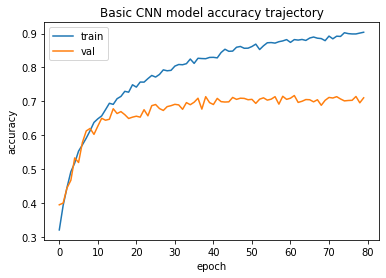

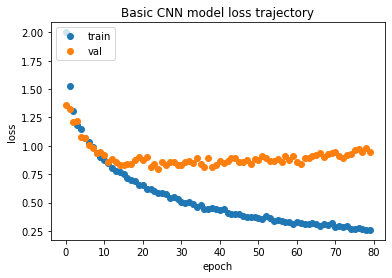

In [110]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_2_results.history['accuracy'])
plt.plot(basic_cnn_model_2_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_2_results.history['loss'],'o')
plt.plot(basic_cnn_model_2_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [111]:
## Testing the basic CNN model

cnn_score = basic_cnn_model_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.7104966044425964
